In [190]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from itertools import product
from collections import defaultdict
from IPython.display import HTML
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
import glob
import requests, re, spacy
nlp = spacy.load('en')

#### i fudged up, I pushed this 50k dataset to github and it truncated it to only 1000 reviews each
#### so i'm pulling these from my local ( "NLP-CAP/aclImdb/Train/neg/*.txt") should i make a new repo?

In [152]:
import os
os.getcwd()

'/Users/hemingway/Desktop/Galvanize/NLP-CAP/aclImdb'

#### creating a list of file names to call/open since the reviews are all different txt files in a folder

In [153]:
pos = glob.glob("Train/pos/*.txt") #globglob
neg = glob.glob("Train/neg/*.txt") #glob
pos[0],neg[0]

('Train/pos/4715_9.txt', 'Train/neg/1821_4.txt')

In [154]:
#'two pos lists: reviews, and scores (scores labelled in filename)'
pos_reviews = []
pos_scores = []
for i in range(len(pos)):
                                    #read files
    x = open(pos[i],'r')
    content = x.read()
    pos_reviews.append(content)
                                    #read scores
    a = pos[i].split('_')
    b = a[1].split('.txt')
    c = [int(s) for s in b if s.isdigit()]
    pos_scores.append(c[0])

In [155]:
#'same same, but different'
neg_reviews = []
neg_scores = []
for i in range(len(neg)):
    
    x = open(neg[i],'r')
    content = x.read()
    neg_reviews.append(content)
    
    a = neg[i].split('_')
    b = a[1].split('.txt')
    c = [int(s) for s in b if s.isdigit()]
    neg_scores.append(c[0])

In [490]:
neg_reviews[42]

'This is the biggest piece of lamo I\'ve ever watched. It is excruciatingly boring I would have rather sat through a seminar on creationism than have watched this if i had known it was going to be as boring as it was. Not even the 40 seconds of the hot chick in the bikini with the big ta tas redeems this of anything lower than a 1.<br /><br />The reviews of this movie claiming that this movie is "unintentionally funny" are absurd and just plain WRONG. Not one thing is funny about this movie. they spend the first 50 or so minutes walking through the woods talking about stuff you wouldn\'t understand nor care about and it is just as lame when the people start dying because you don\'t even know who the people are because they are so UNINTERESTING. Honestly though, I didn\'t watch it to the ending, but that should say something about how horrible it is. WORST MOVIE EVER.<br /><br />Immediately after ejecting this filth from my DVD player I started scraping it against the cement in front of

In [156]:
def clean_line(line):
    '''
    clean_line
    
    input: line (str) - a line from the script
    return: list of cleaned, lemetized tokens
    
    This does all the NLP preprocessing:
        * lower text
        * split on special characters, while removing annotations
        * remove stop words
        * perform lemmetization
        *** MIGHT REMOVE IMPORTANT WORDS IDK MAN
    '''
    line = line.lower()
    line = [x for x in re.findall(r"[\w()']+", line) if x[0] != "(" and x[-1] != ")"]
    s_stop = set(stopwords.words())
    line = ' '.join([word for word in line if word not in s_stop])
    return [token.lemma_ for token in nlp(line)]

#### cleaning reviews and assigning it to a new list
#### these cells take a few minutes to run

In [144]:
p = []
for i in range(len(pos)):
    p.append(clean_line(pos_reviews[i]))

In [158]:
n = []
for i in range(len(neg)):
    n.append(clean_line(neg_reviews[i]))

#### joining the lists of lists to feed into a single column in a dataframe; same for scores.

In [204]:
#reviews and scores
r = p + n
s = pos_scores + neg_scores

In [205]:
#binary list
b = []
for x in s:
    if x > 5:
        b.append(1)
    else:
        b.append(0)


#### made a DF with reviews and corresponding scores, also adding binary column for good or bad

In [206]:
Movies = pd.DataFrame({'Reviews':r})
Movies['Scores'] = s
Movies['Binary'] = b

In [262]:
Movies['Review_String'] = [' '.join(i) for i in Movies['Reviews']]

In [495]:
Movies.drop(columns=['Reviews'])

,Scores,Binary,Review_String,length
20149,3,0,movie terrible good effect,26
17753,1,0,rent even dollar rental night,29
22998,1,0,me merciless little bardwork movie foul,39
14128,3,0,better choose paul verhoeven 's even watch,42
7361,10,1,know like movie well never get tired watching,45
10043,9,1,adrian pasdar excellent film make fascinating ...,51
24780,1,0,long bore blasphemous never glad see end credi...,52
14274,2,0,without doubt bad movie ever see funny interes...,55
16033,2,0,comment stupid movie act average bad screenpla...,58
21338,1,0,rating 1 begin express dull depressing relentl...,61


Text(0, 0.5, 'Review Count')

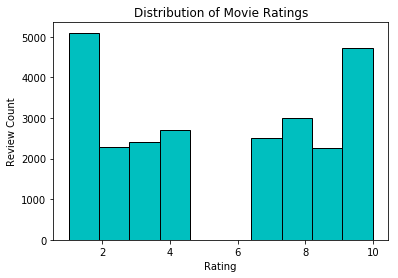

In [468]:
plt.hist(Movies['Scores'], bins = 10, color = "c", ec="k")
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Review Count')

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [284]:
tf_vectorizer = CountVectorizer(lowercase=False)

vectorized = (tf_vectorizer.fit_transform(Movies['Review_String']))


In [422]:
vectorized[1].indices, tf_vectorizer.get_feature_names()[vectorized[0].indices[2]]

(array([51907, 18430, 16801, 56934, 37996, 62840, 36633, 15773,  7861,
        51166, 22201, 53395, 18652, 50410, 31699, 29968, 50275, 23754,
         5254, 11558, 19497,  4630, 48322, 43686, 13371, 38938, 15252,
        62763, 22223, 24178, 61784, 18044, 15433,  2872,  6126, 36810,
        55562, 12899, 31369, 36402,  8379, 62620, 20042, 28230, 39044,
        12508, 53790, 46261, 56841, 57560, 44451,  6704,  8031, 25876,
         7987, 13189, 38036, 41514, 10061, 45728, 14382, 42454, 38386,
        37675,  9107, 62252, 45794, 25921, 22723, 24531, 54885,  4182,
        42139, 52031, 52299, 24669, 37367, 60140, 52752, 44415, 47970,
        21007, 58633, 45796, 13287, 53873, 19806, 19983, 20687, 26976,
         6481, 43638, 49558, 33877, 38047], dtype=int32), 'jr')

In [435]:
tfidf_vectorizer = TfidfVectorizer(lowercase=False, stop_words='english', max_features=10000)

tfidf = tfidf_vectorizer.fit_transform(Movies['Review_String'])

print([ x for x in tfidf[2].toarray()[0] if x!=0])

[0.9086330849834293, 0.36697009691947924, 0.19929592278921335]


### Random Forest on Binary Scores

In [440]:

X_train, X_test, y_train, y_test = train_test_split(tfidf, Movies['Binary'],\
                                                    test_size=0.2, random_state=0)

In [441]:
rf_d10 = RandomForestClassifier(n_estimators=1000, max_depth=12, n_jobs = -1)
rf_d10.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [442]:
X_train.shape

(20000, 10000)

In [443]:
rf_d10.score(X_test, y_test)

0.827

In [427]:
importances = rf_d10.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(100):
    print((f + 1, tfidf_vectorizer.get_feature_names()[indices[f]], importances[indices[f]]))

Feature ranking:
(1, 'bad', 0.05447833593677261)
(2, 'great', 0.025200529530232822)
(3, 'waste', 0.02196928922458016)
(4, 'awful', 0.01983197035245915)
(5, 'terrible', 0.014131709168887046)
(6, 'wonderful', 0.01370087887645867)
(7, 'excellent', 0.012880034744385345)
(8, 'love', 0.012483221011260428)
(9, 'money', 0.010770918655378386)
(10, 'stupid', 0.010315567361893733)
(11, 'crap', 0.01000901536489335)
(12, 'minute', 0.009379390638091805)
(13, 'suppose', 0.009327173458267739)
(14, 'plot', 0.00928294828428864)
(15, 'horrible', 0.009075350262210909)
(16, 'enjoy', 0.008337502695439043)
(17, 'poor', 0.007825124155961117)
(18, 'script', 0.007275898142161297)
(19, 'movie', 0.006785860190620155)
(20, 'amazing', 0.006489994756020808)
(21, 'perfect', 0.00636723391475398)
(22, 'bore', 0.006345639247153752)
(23, 'avoid', 0.006312268388898658)
(24, 'favorite', 0.0061201039584592954)
(25, 'poorly', 0.00598832861791029)
(26, 'performance', 0.0059381551597405356)
(27, 'lame', 0.0055724536596428445)


In [371]:
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()

In [400]:
tf_vectorizer.get_feature_names()[4691]

'backroom'

In [401]:
indices[0]

807

### Regression

In [315]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [359]:

X_train, X_test, y_train, y_test = train_test_split(tfidf, Movies['Binary'],\
                                                    test_size=0.2, random_state=0)

In [360]:
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
print("Accuracy on test set:")
logreg.score(X_test, y_test)

Accuracy on test set:


0.8802

In [407]:
# roc_d10 = roc_curve(y_test, rf_d10.predict_proba(X_test)[:,1], pos_label='1')

# plt.figure()
# lw = 2

# plt.plot(roc_d10, color='c',
#          lw=lw, label='Random Forest, max depth=10')
# plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [408]:
#keras implementation
Movies['length']= Movies['Review_String'].str.len()
Movies.sort_values('length', ascending=True, inplace= True)

In [409]:
Movies2 = Movies.iloc[:20000,:]

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.text